In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Evaluate the time spent to generate the responses

In [ ]:
# example of response file
responses_df = pd.read_csv("output/claude-3-5-sonnet-20241022_ai_generated_mitigation_responses.csv", index_col=0)

responses_df

,mitigation_list,mitigations_generated,model,created_at,total_duration,load_duration,prompt_eval_count,prompt_eval_duration,eval_count,eval_duration
attack,,,,,,,,,,
Session Credential Falsification through Manipulation,[],"{\n ""mitigations"": [\n {\n ""name"": ""I...",claude-3-5-sonnet-20241022,1.732897e+09,3758280515,NaN,NaN,NaN,NaN,NaN
Session Credential Falsification through Prediction,['Use a strong source of randomness to generat...,"{\n ""mitigations"": [\n {\n ""name"": ""U...",claude-3-5-sonnet-20241022,1.732897e+09,5271106004,NaN,NaN,NaN,NaN,NaN
Session Sidejacking,['Make sure that HTTPS is used to communicate ...,"{\n ""mitigations"": [\n {\n ""name"": ""I...",claude-3-5-sonnet-20241022,1.732897e+09,5325222492,NaN,NaN,NaN,NaN,NaN
Cross Site Tracing,"[""Administrators should disable support for HT...","{\n ""mitigations"": [\n {\n ""name"": ""D...",claude-3-5-sonnet-20241022,1.732897e+09,2971656560,NaN,NaN,NaN,NaN,NaN
Reusing Session IDs (aka Session Replay),['Always invalidate a session ID after the use...,"{\n ""mitigations"": [\n {\n ""name"": ""P...",claude-3-5-sonnet-20241022,1.732897e+09,4897415161,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
Using Alternative IP Address Encodings,['Design: Default deny access control policies...,"{\n ""mitigations"": [\n {\n ""name"": ""D...",claude-3-5-sonnet-20241022,1.732898e+09,10686417579,NaN,NaN,NaN,NaN,NaN
Exploiting Multiple Input Interpretation Layers,['An iterative approach to input validation ma...,"{\n ""mitigations"": [\n {\n ""name"": ""I...",claude-3-5-sonnet-20241022,1.732898e+09,12188633441,NaN,NaN,NaN,NaN,NaN
Embedding NULL Bytes,['Properly handle the NULL characters supplied...,"{\n ""mitigations"": [\n {\n ""name"": ""I...",claude-3-5-sonnet-20241022,1.732898e+09,10186981916,NaN,NaN,NaN,NaN,NaN


In [60]:
# Conversion factor from nanoseconds to minutes
ns_to_minutes = 60 *  10**9

metrics_data = {
    'Metric': ['Max Total Generation Time', 'Min Total Generation Time', 'Avg Total Generation Time', 
               'Max Model Loading Time', 'Avg Model Loading Time', 
               'Max Prompt Eval Time', 'Avg Prompt Eval Time', 
               'Max Response Generation Time', 'Avg Response Generation Time'],
    
    'Value (Minutes)': [
        responses_df['total_duration'].max() / ns_to_minutes,  # Max generation time
        responses_df['total_duration'].min() / ns_to_minutes,  # Min generation time
        responses_df['total_duration'].mean() / ns_to_minutes,  # Avg generation time
        
        responses_df['load_duration'].max() / ns_to_minutes,  # Max loading time
        responses_df['load_duration'].mean() / ns_to_minutes,  # Avg loading time
        
        responses_df['prompt_eval_duration'].max() / ns_to_minutes,  # Max prompt evaluation time
        responses_df['prompt_eval_duration'].mean() / ns_to_minutes,  # Avg prompt evaluation time
        
        responses_df['eval_duration'].max() / ns_to_minutes,  # Max response evaluation time
        responses_df['eval_duration'].mean() / ns_to_minutes   # Avg response evaluation time
    ]
}

# Create the DataFrame with metrics data
metrics_df = pd.DataFrame(metrics_data).set_index('Metric')
metrics_df['Value (Minutes)'] = round(metrics_df['Value (Minutes)'], 2)
metrics_df

,Value (Minutes)
Metric,
Max Total Generation Time,0.29
Min Total Generation Time,0.05
Avg Total Generation Time,0.18
Max Model Loading Time,NaN
Avg Model Loading Time,NaN
Max Prompt Eval Time,NaN
Avg Prompt Eval Time,NaN
Max Response Generation Time,NaN
Avg Response Generation Time,NaN


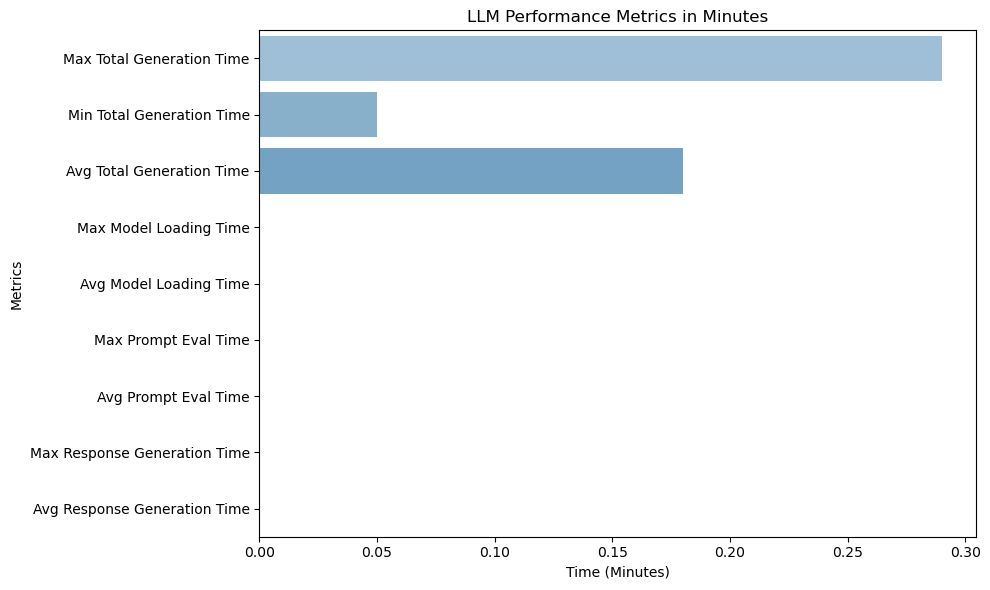

In [61]:
# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Value (Minutes)', y='Metric', hue='Metric', legend=False, data=metrics_df, palette='Blues_d')

# Add labels and title
plt.title('LLM Performance Metrics in Minutes')
plt.xlabel('Time (Minutes)')
plt.ylabel('Metrics')

# Show the plot
plt.tight_layout()
plt.show()

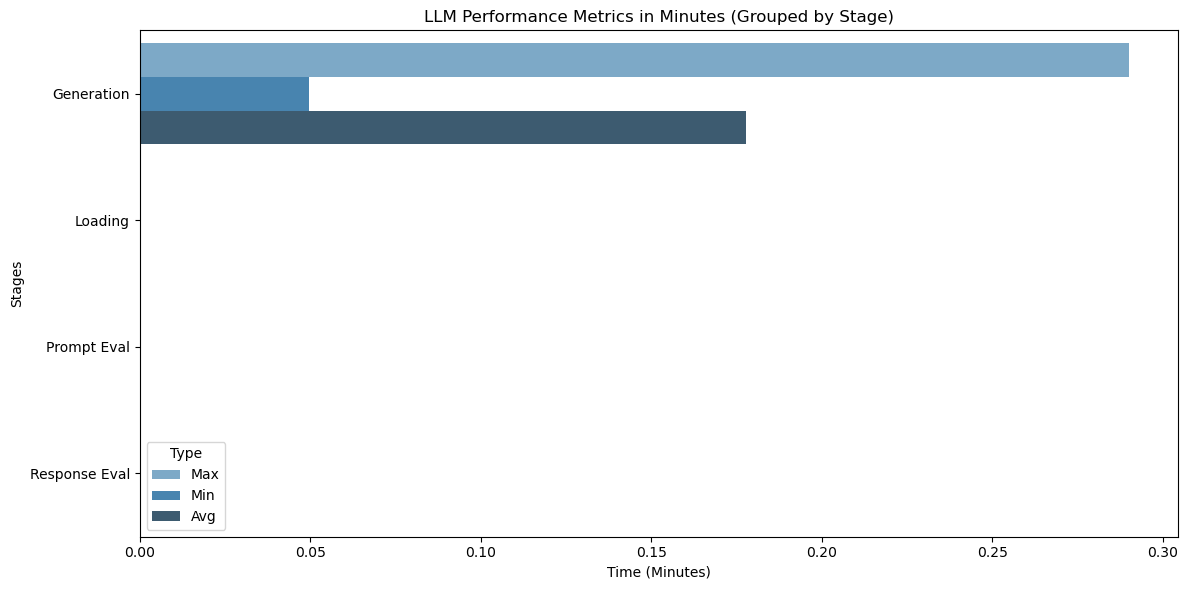

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Conversion factor from nanoseconds to minutes
ns_to_minutes = 60 * 10**9

# Calculate the metrics (converting to minutes)
metrics_data = {
    'Metric': ['Max Generation Time', 'Min Generation Time', 'Avg Generation Time', 
               'Max Loading Time', 'Avg Loading Time', 
               'Max Prompt Eval Time', 'Avg Prompt Eval Time', 
               'Max Response Eval Time', 'Avg Response Eval Time'],
    
    'Stage': ['Generation', 'Generation', 'Generation', 
              'Loading', 'Loading', 
              'Prompt Eval', 'Prompt Eval', 
              'Response Eval', 'Response Eval'],
    
    'Value (Minutes)': [
        responses_df['total_duration'].max() / ns_to_minutes,  # Max generation time
        responses_df['total_duration'].min() / ns_to_minutes,  # Min generation time
        responses_df['total_duration'].mean() / ns_to_minutes,  # Avg generation time
        
        responses_df['load_duration'].max() / ns_to_minutes,  # Max loading time
        responses_df['load_duration'].mean() / ns_to_minutes,  # Avg loading time
        
        responses_df['prompt_eval_duration'].max() / ns_to_minutes,  # Max prompt evaluation time
        responses_df['prompt_eval_duration'].mean() / ns_to_minutes,  # Avg prompt evaluation time
        
        responses_df['eval_duration'].max() / ns_to_minutes,  # Max response evaluation time
        responses_df['eval_duration'].mean() / ns_to_minutes   # Avg response evaluation time
    ],
    
    'Type': ['Max', 'Min', 'Avg', 
             'Max', 'Avg', 
             'Max', 'Avg', 
             'Max', 'Avg']
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Set up the plot with grouping
plt.figure(figsize=(12, 6))
sns.barplot(x='Value (Minutes)', y='Stage', hue='Type', data=metrics_df, palette='Blues_d')

# Add labels and title
plt.title('LLM Performance Metrics in Minutes (Grouped by Stage)')
plt.xlabel('Time (Minutes)')
plt.ylabel('Stages')

# Show the plot
plt.tight_layout()
plt.show()


Compare generation time

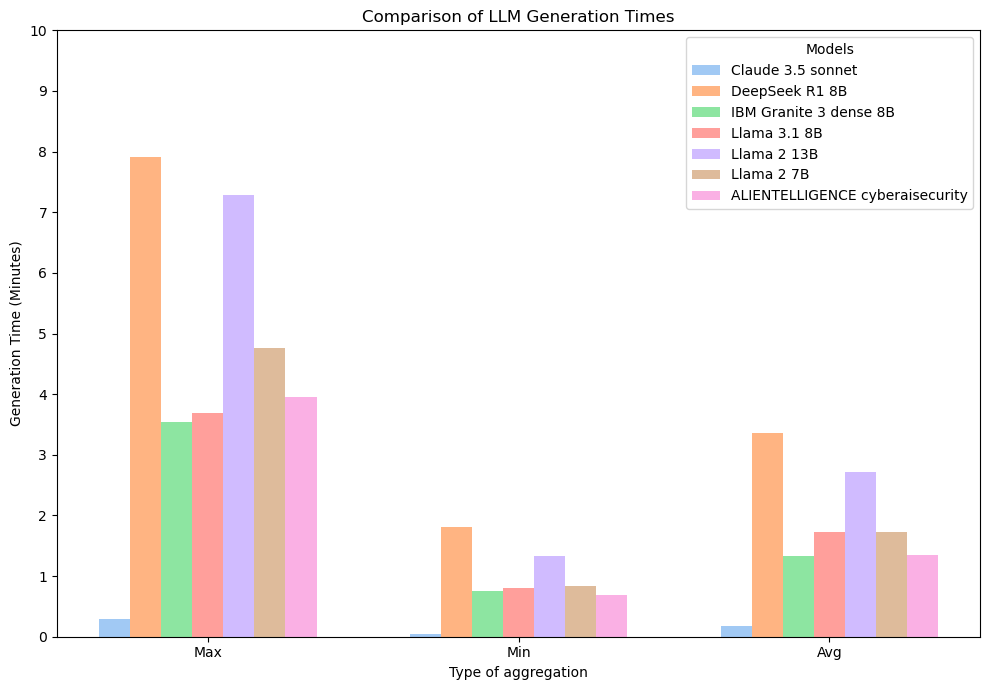

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Conversion factor from nanoseconds to minutes
ns_to_minutes = 60 * 10**9

# List of file paths
file_paths = [
    "output/claude-3-5-sonnet-20241022_ai_generated_mitigation_responses.csv",
    "output/deepseek-r1-8b_ai_generated_mitigation_responses.csv",
    "output/granite3-dense-8b_ai_generated_mitigation_responses.csv",
    "output/llama3.1_ai_generated_mitigation_responses.csv",
    "output/llama2-13b_ai_generated_mitigation_responses.csv",
    "output/llama2-7b_ai_generated_mitigation_responses.csv",
    "output/ALIENTELLIGENCE-cyberaisecurity_ai_generated_mitigation_responses.csv"
]

# Custom labels for the legend
custom_labels = ["Claude 3.5 sonnet", "DeepSeek R1 8B", "IBM Granite 3 dense 8B", "Llama 3.1 8B", "Llama 2 13B", "Llama 2 7B", "ALIENTELLIGENCE cyberaisecurity"]

# Initialize an empty dictionary to store metrics for each model
metrics_summary = {label: {"Max": 0, "Min": 0, "Avg": 0} for label in custom_labels}

# Loop through file paths and corresponding labels
for path, label in zip(file_paths, custom_labels):
    # Read the CSV file
    df = pd.read_csv(path, index_col=0)
    
    # Calculate metrics
    metrics_summary[label]["Max"] = df['total_duration'].max() / ns_to_minutes
    metrics_summary[label]["Min"] = df['total_duration'].min() / ns_to_minutes
    metrics_summary[label]["Avg"] = df['total_duration'].mean() / ns_to_minutes

# Prepare data for plotting
metrics = ["Max", "Min", "Avg"]
x = np.arange(len(metrics))  # the label locations
width = 0.1  # the width of the bars

# Define pastel colors (using seaborn's color palette)
pastel_colors = sns.color_palette("pastel", len(custom_labels))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 7))

# Add bars for each model
for i, (label, values) in enumerate(metrics_summary.items()):
    offsets = [values[metric] for metric in metrics]
    ax.bar(x + i * width, offsets, width, label=label, color=pastel_colors[i])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Type of aggregation')
ax.set_ylabel('Generation Time (Minutes)')
ax.set_title('Comparison of LLM Generation Times')
ax.set_xticks(x + width * (len(custom_labels) - 1) / 2)
ax.set_xticklabels(metrics)
plt.legend(custom_labels, title='Models', fontsize=10)
ax.set_ylim(0,10)

# Add the true value on top of the tallest bin in the "Max" group
max_metric_index = metrics.index("Max")  # Index for the "Max" group
max_heights = [values["Max"] for values in metrics_summary.values()]  # Get all "Max" values
tallest_bin_index = np.argmax(max_heights)  # Index of the tallest bin in the "Max" group
tallest_bin_value = max_heights[tallest_bin_index]  # Value of the tallest bin

# Add text only for the tallest bin in the "Max" group
# ax.text(
#     x[max_metric_index] + tallest_bin_index * width, 
#     tallest_bin_value - 10 + 0.1, 
#     f"{tallest_bin_value:.2f}", 
#     ha='center', 
#     va='bottom', 
#     fontsize=10
# )

# Increase the number of ticks on the y-axis
ax.yaxis.set_major_locator(plt.MaxNLocator(10))

# Adjust subplot parameters to reduce white space
plt.subplots_adjust(bottom=0.2)

# Layout adjustment
plt.tight_layout()
plt.show()

# Evaluate the quality of generated responses using LLM-as-a-Judge

In [ ]:
# example of evaluation file
pd.read_csv("evaluation/LLMs/claude-3-5/deepseek-r1-8b_ai_generated_evaluations.csv", index_col=0)

,mitigation_list,mitigations_generated,model,llm_judge,evaluation_generated
attack,,,,,
Session Credential Falsification through Manipulation,[],"\n{\n ""mitigations"": [\n {\n ""name"": ...",deepseek-r1:8b,claude-3-5-sonnet-20241022,"[TextBlock(text=""The response follows good sec..."
Session Credential Falsification through Prediction,['Use a strong source of randomness to generat...,"\n{\n ""mitigations"": [\n {\n ""name"": ...",deepseek-r1:8b,claude-3-5-sonnet-20241022,[TextBlock(text='This response provides a well...
Session Sidejacking,['Make sure that HTTPS is used to communicate ...,"\n{\n ""mitigations"": [\n {\n ""name"": ...",deepseek-r1:8b,claude-3-5-sonnet-20241022,"[TextBlock(text=""This response provides a well..."
Cross Site Tracing,"[""Administrators should disable support for HT...","\n{\n ""mitigations"": [\n {\n ""name"": ...",deepseek-r1:8b,claude-3-5-sonnet-20241022,"[TextBlock(text=""The response provided by the ..."
Reusing Session IDs (aka Session Replay),['Always invalidate a session ID after the use...,"\n{\n ""mitigations"": [\n {\n ""name"": ...",deepseek-r1:8b,claude-3-5-sonnet-20241022,[TextBlock(text='Let me evaluate the response:...
Session Fixation,['Use a strict session management mechanism th...,"\n{\n ""mitigations"": [\n {\n ""name"": ...",deepseek-r1:8b,claude-3-5-sonnet-20241022,"[TextBlock(text=""The response provides a well-..."
Cross Site Identification,['Usage: Users should always explicitly log ou...,"\n{\n ""mitigations"": [\n {\n ""name"": ...",deepseek-r1:8b,claude-3-5-sonnet-20241022,"[TextBlock(text=""The response follows good sec..."
"Removal of filters: Input filters, output filters, data masking",[],"\n{\n ""mitigations"": [\n {\n ""name"": ...",deepseek-r1:8b,claude-3-5-sonnet-20241022,[TextBlock(text='This response provides a well...
Removing/short-circuiting 'Purse' logic: removing/mutating 'cash' decrements,[],"\n{\n ""mitigations"": [\n {\n ""name"": ...",deepseek-r1:8b,claude-3-5-sonnet-20241022,[TextBlock(text='The response follows the requ...


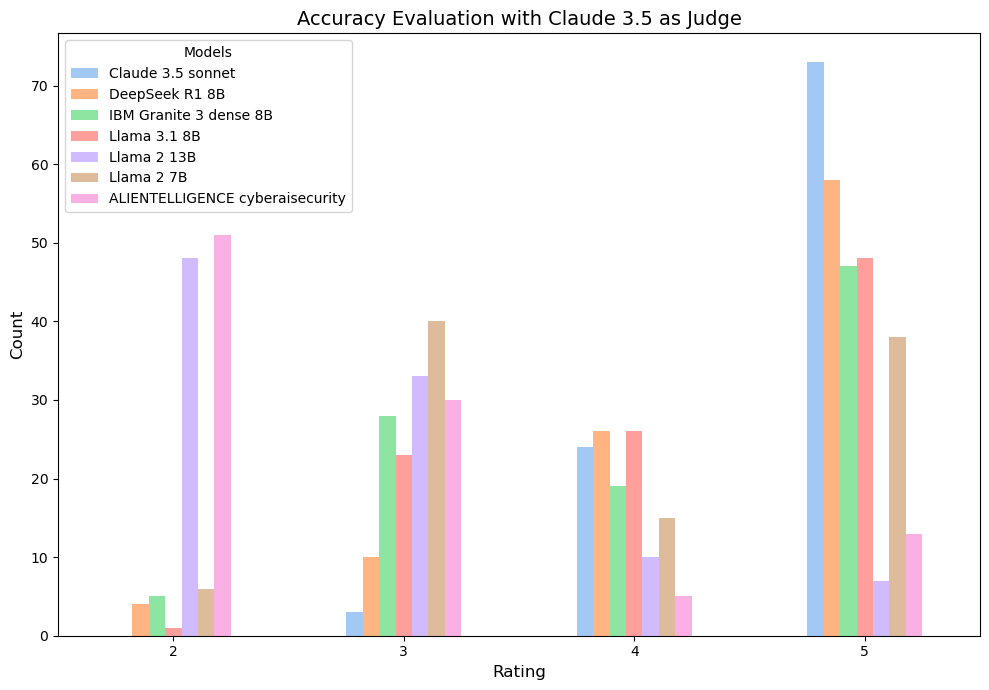

In [115]:
# List of file paths
file_paths = [
    "evaluation/LLMs/claude-3-5/claude-3-5-sonnet-20241022_ai_generated_evaluations.csv",
    "evaluation/LLMs/claude-3-5/deepseek-r1-8b_ai_generated_evaluations.csv",
    "evaluation/LLMs/claude-3-5/granite3-dense-8b_ai_generated_evaluations.csv",
    "evaluation/LLMs/claude-3-5/llama3.1_ai_generated_evaluations.csv",
    "evaluation/LLMs/claude-3-5/llama2-13b_ai_generated_evaluations.csv",
    "evaluation/LLMs/claude-3-5/llama2-7b_ai_generated_evaluations.csv",
    "evaluation/LLMs/claude-3-5/ALIENTELLIGENCE-cyberaisecurity_ai_generated_evaluations.csv"
]

# Custom labels for the legend
custom_labels = ["Claude 3.5 sonnet", "DeepSeek R1 8B", "IBM Granite 3 dense 8B", "Llama 3.1 8B", "Llama 2 13B", "Llama 2 7B", "ALIENTELLIGENCE cyberaisecurity"]

# Dictionary to store rating counts for each file
all_rating_counts = {}

# Process each file
for file_path in file_paths:
    # Read the CSV file
    evaluation = pd.read_csv(file_path)
    
    evaluation_ratings = []
    for evaluation_str in evaluation['evaluation_generated']:
        # Regular expression to extract the rating
        match = re.search(r"(?:\\n\\n|\\*\\*)Rating: \[\[(\d)\]\]", evaluation_str)
        if match:
            evaluation_rating = int(match.group(1))  # Get the matched group as an integer
        else:
            evaluation_rating = -1  # Default to -1 if no match
       
        evaluation_ratings.append(evaluation_rating)
    
    # Create a DataFrame for the current file
    df = pd.DataFrame({'Ratings': evaluation_ratings})

    # Count occurrences of each rating
    rating_counts = df['Ratings'].value_counts().sort_index()
    
    # Store the counts in the dictionary
    all_rating_counts[file_path] = rating_counts

# Combine all counts into a single DataFrame
comparison_df = pd.DataFrame(all_rating_counts).fillna(0)

# Define pastel colors (using seaborn's color palette)
pastel_colors = sns.color_palette("pastel", len(custom_labels))

# Plot the counts
comparison_df.plot(kind='bar', figsize=(10, 7), color=pastel_colors)

# Add labels and title
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Accuracy Evaluation with Claude 3.5 as Judge', fontsize=14)

# Keep x-axis labels horizontal
plt.xticks(rotation=0)

# Add a legend
plt.legend(custom_labels, title='Models', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

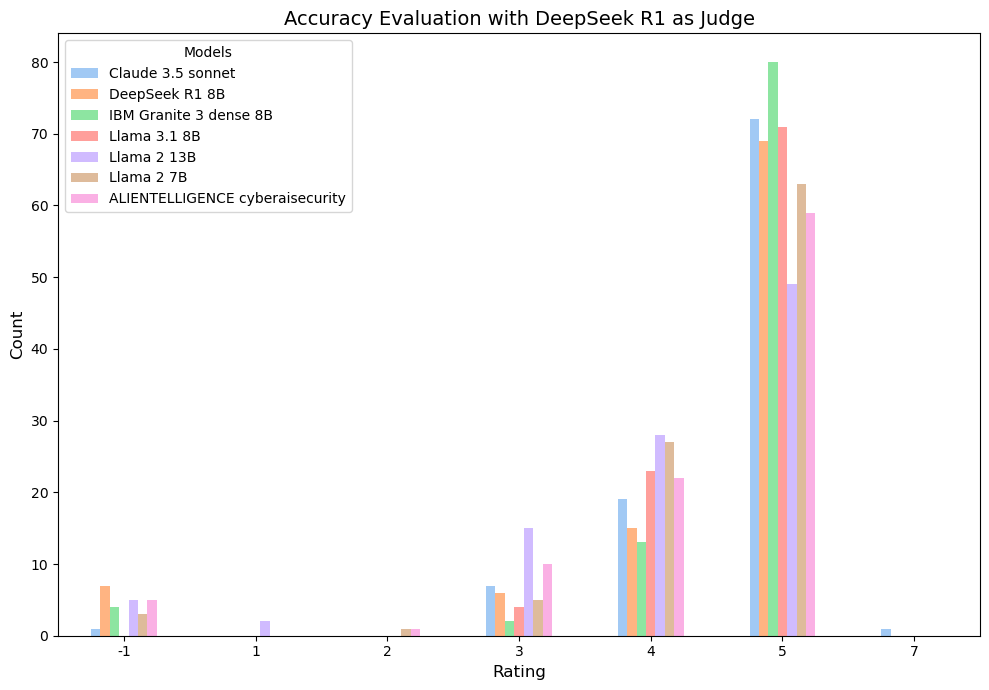

In [93]:
# List of file paths
file_paths = [
    "evaluation/LLMs/deepseek-r1-8b/claude-3-5-sonnet-20241022_ai_generated_evaluations.csv",
    "evaluation/LLMs/deepseek-r1-8b/deepseek-r1-8b_ai_generated_evaluations.csv",
    "evaluation/LLMs/deepseek-r1-8b/granite3-dense-8b_ai_generated_evaluations.csv",
    "evaluation/LLMs/deepseek-r1-8b/llama3.1_ai_generated_evaluations.csv",
    "evaluation/LLMs/deepseek-r1-8b/llama2-13b_ai_generated_evaluations.csv",
    "evaluation/LLMs/deepseek-r1-8b/llama2-7b_ai_generated_evaluations.csv",
    "evaluation/LLMs/deepseek-r1-8b/ALIENTELLIGENCE-cyberaisecurity_ai_generated_evaluations.csv"
]

# Custom labels for the legend
custom_labels = ["Claude 3.5 sonnet", "DeepSeek R1 8B", "IBM Granite 3 dense 8B", "Llama 3.1 8B", "Llama 2 13B", "Llama 2 7B", "ALIENTELLIGENCE cyberaisecurity"]

# Dictionary to store rating counts for each file
all_rating_counts = {}

# Process each file
for file_path in file_paths:
    # Read the CSV file
    evaluation = pd.read_csv(file_path)
    
    evaluation_ratings = []
    for evaluation_str in evaluation['evaluation_generated']:
        # Regular expression to extract the rating
        evaluation_str = str(evaluation_str)
        match = re.search(r"(?:\\n\\n|\\*\\*)Rating: \[\[(\d)\]\]", evaluation_str)
        if match:
            evaluation_rating = int(match.group(1))  # Get the matched group as an integer
        else:
            evaluation_rating = -1  # Default to -1 if no match

        evaluation_ratings.append(evaluation_rating)
    
    # Create a DataFrame for the current file
    df = pd.DataFrame({'Ratings': evaluation_ratings})

    # Count occurrences of each rating
    rating_counts = df['Ratings'].value_counts().sort_index()
    
    # Store the counts in the dictionary
    all_rating_counts[file_path] = rating_counts

# Combine all counts into a single DataFrame
comparison_df = pd.DataFrame(all_rating_counts).fillna(0)

# Define pastel colors (using seaborn's color palette)
pastel_colors = sns.color_palette("pastel", len(custom_labels))

# Plot the counts
comparison_df.plot(kind='bar', figsize=(10, 7), color=pastel_colors)

# Add labels and title
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Accuracy Evaluation with DeepSeek R1 as Judge', fontsize=14)

# Keep x-axis labels horizontal
plt.xticks(rotation=0)

# Add a legend
plt.legend(custom_labels, title='Models', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

CONVERT DEEPSEEK FILE

In [100]:
# read csv deepseek in output directory
deepseek_df = pd.read_csv("output/deepseek-r1-8b_ai_generated_mitigation_responses.csv", index_col=0)
deepseek_df

,mitigation_list,mitigations_generated,model,created_at,total_duration,load_duration,prompt_eval_count,prompt_eval_duration,eval_count,eval_duration
attack,,,,,,,,,,
Session Credential Falsification through Manipulation,[],"<think>\nOkay, so the user has given me this q...",deepseek-r1:8b,2025-02-24T15:16:06.3946047Z,153834650300,7578033600,179,18932000000,653,127174000000
Session Credential Falsification through Prediction,['Use a strong source of randomness to generat...,"<think>\nAlright, so the user has asked for a ...",deepseek-r1:8b,2025-02-24T15:21:41.1674433Z,132720765900,35267500,267,25362000000,573,107322000000
Session Sidejacking,['Make sure that HTTPS is used to communicate ...,"<think>\nOkay, so the user is asking for a JSO...",deepseek-r1:8b,2025-02-24T15:24:28.810959Z,165604708400,20378200,250,29805000000,696,135776000000
Cross Site Tracing,"[""Administrators should disable support for HT...","<think>\nOkay, so I need to figure out how to ...",deepseek-r1:8b,2025-02-24T15:27:00.2944841Z,149446663400,31734800,213,24606000000,637,124797000000
Reusing Session IDs (aka Session Replay),['Always invalidate a session ID after the use...,"<think>\nOkay, so I'm trying to help someone b...",deepseek-r1:8b,2025-02-24T15:31:26.0333015Z,263691182500,20555300,315,37594000000,1131,226073000000
...,...,...,...,...,...,...,...,...,...,...
Using Alternative IP Address Encodings,['Design: Default deny access control policies...,"<think>\nAlright, let me try to figure out how...",deepseek-r1:8b,2025-02-25T12:10:55.5059294Z,118147886300,42401100,255,29928000000,442,88175000000
Exploiting Multiple Input Interpretation Layers,['An iterative approach to input validation ma...,"<think>\nOkay, so I'm trying to figure out how...",deepseek-r1:8b,2025-02-25T12:15:15.5385642Z,257983128100,31825900,317,38664000000,1054,219285000000
Embedding NULL Bytes,['Properly handle the NULL characters supplied...,"<think>\nOkay, so I've got this query about ge...",deepseek-r1:8b,2025-02-25T12:17:31.639442Z,134026152900,41760900,198,23241000000,557,110739000000


In [108]:
# in deepseek_df["mitigations_generated"], select, if present, data betweek ```json and ``` and store in a new df
deepseek_df["mitigations_generated"] = deepseek_df["mitigations_generated"].str.extract(r"```json(.*?)```", flags=re.DOTALL)
deepseek_df

,mitigation_list,mitigations_generated,model,created_at,total_duration,load_duration,prompt_eval_count,prompt_eval_duration,eval_count,eval_duration
attack,,,,,,,,,,
Session Credential Falsification through Manipulation,[],"\n{\n ""mitigations"": [\n {\n ""name"": ...",deepseek-r1:8b,2025-02-24T15:16:06.3946047Z,153834650300,7578033600,179,18932000000,653,127174000000
Session Credential Falsification through Prediction,['Use a strong source of randomness to generat...,"\n{\n ""mitigations"": [\n {\n ""name"": ...",deepseek-r1:8b,2025-02-24T15:21:41.1674433Z,132720765900,35267500,267,25362000000,573,107322000000
Session Sidejacking,['Make sure that HTTPS is used to communicate ...,"\n{\n ""mitigations"": [\n {\n ""name"": ...",deepseek-r1:8b,2025-02-24T15:24:28.810959Z,165604708400,20378200,250,29805000000,696,135776000000
Cross Site Tracing,"[""Administrators should disable support for HT...","\n{\n ""mitigations"": [\n {\n ""name"": ...",deepseek-r1:8b,2025-02-24T15:27:00.2944841Z,149446663400,31734800,213,24606000000,637,124797000000
Reusing Session IDs (aka Session Replay),['Always invalidate a session ID after the use...,"\n{\n ""mitigations"": [\n {\n ""name"": ...",deepseek-r1:8b,2025-02-24T15:31:26.0333015Z,263691182500,20555300,315,37594000000,1131,226073000000
...,...,...,...,...,...,...,...,...,...,...
Using Alternative IP Address Encodings,['Design: Default deny access control policies...,"\n{\n ""mitigations"": [\n {\n ""name"": ...",deepseek-r1:8b,2025-02-25T12:10:55.5059294Z,118147886300,42401100,255,29928000000,442,88175000000
Exploiting Multiple Input Interpretation Layers,['An iterative approach to input validation ma...,"\n{\n ""mitigations"": [\n {\n ""name"": ...",deepseek-r1:8b,2025-02-25T12:15:15.5385642Z,257983128100,31825900,317,38664000000,1054,219285000000
Embedding NULL Bytes,['Properly handle the NULL characters supplied...,"\n{\n ""mitigations"": [\n {\n ""name"": ...",deepseek-r1:8b,2025-02-25T12:17:31.639442Z,134026152900,41760900,198,23241000000,557,110739000000


In [109]:
# write to csv
#deepseek_df.to_csv("output/deepseek-r1-8b_ai_generated_mitigation_responses.csv")